In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


**extracting --- renamed_healthy**

In [ ]:
import zipfile
import os

# Paths
zip_file_path = '/content/drive/MyDrive/renamed_healthy-20250807T190007Z-1-001.zip'
project_folder = '/content/drive/MyDrive/Wheat_Leaf_Disease_Project'
extract_to = os.path.join(project_folder, 'dataset_folder')

# Make sure project folder exists
os.makedirs(extract_to, exist_ok=True)

# Extract zip
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Extraction completed!")


Extraction completed!


**extracting --- renamed_Wheat_Leaf_Rust**

In [ ]:


#zip_file_path = '/content/drive/MyDrive/renamed_Wheat_Leaf_Rust-20250807T190003Z-1-001.zip'

import zipfile
import os

# Paths
zip_file_path = '/content/drive/MyDrive/renamed_Wheat_Leaf_Rust-20250807T190003Z-1-001.zip'
project_folder = '/content/drive/MyDrive/Wheat_Leaf_Disease_Project'
extract_to = os.path.join(project_folder, 'dataset_folder')

# Make sure project folder exists
os.makedirs(extract_to, exist_ok=True)

# Extract zip
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Extraction completed!")


Extraction completed!


**extracting --- renamed_Wheat_Loose_Smut**

In [ ]:

# zip_file_path = '/content/drive/MyDrive/renamed_Wheat_Loose_Smut-20250807T185949Z-1-001.zip'


import zipfile
import os

# Paths
zip_file_path = '/content/drive/MyDrive/renamed_Wheat_Loose_Smut-20250807T185949Z-1-001.zip'
project_folder = '/content/drive/MyDrive/Wheat_Leaf_Disease_Project'
extract_to = os.path.join(project_folder, 'dataset_folder')

# Make sure project folder exists
os.makedirs(extract_to, exist_ok=True)

# Extract zip
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Extraction completed!")


Extraction completed!


**count of images in each category.**

In [ ]:
import os

# Updated folder paths in Google Drive
healthy_folder = '/content/drive/MyDrive/Wheat_Leaf_Disease_Project/dataset_folder/renamed_healthy'
rust_folder = '/content/drive/MyDrive/Wheat_Leaf_Disease_Project/dataset_folder/renamed_Wheat_Leaf_Rust'
smut_folder = '/content/drive/MyDrive/Wheat_Leaf_Disease_Project/dataset_folder/renamed_Wheat_Loose_Smut'

# Count the number of images in each folder
healthy_count = len(os.listdir(healthy_folder))
rust_count = len(os.listdir(rust_folder))
smut_count = len(os.listdir(smut_folder))

print(f"Healthy Leaves: {healthy_count} images")
print(f"Leaf Rust: {rust_count} images")
print(f"Wheat Loose Smut: {smut_count} images")



Healthy Leaves: 1278 images
Leaf Rust: 135 images
Wheat Loose Smut: 918 images


***Step-by-Step Data Preprocessing.***

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator


Visualize Some Sample Images

Healthy Leaf Samples:


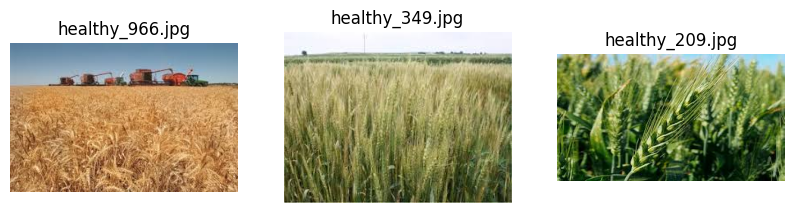

Leaf Rust Samples:


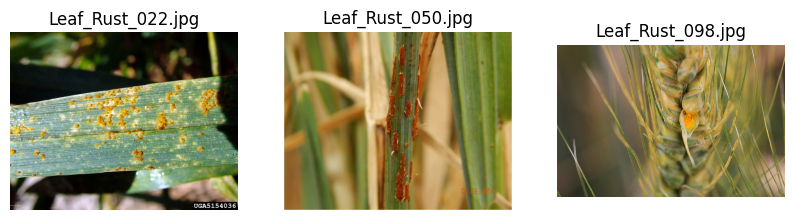

Loose Smut Samples:


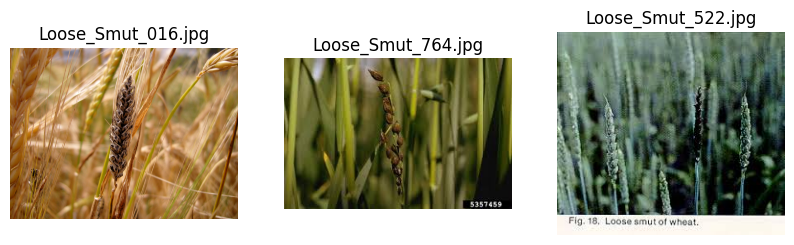

In [ ]:
# Define folder paths
healthy_folder = '/content/drive/MyDrive/Wheat_Leaf_Disease_Project/dataset_folder/renamed_healthy'
rust_folder = '/content/drive/MyDrive/Wheat_Leaf_Disease_Project/dataset_folder/renamed_Wheat_Leaf_Rust'
smut_folder = '/content/drive/MyDrive/Wheat_Leaf_Disease_Project/dataset_folder/renamed_Wheat_Loose_Smut'


# Display random sample images from each category
def display_sample_images(folder, num_samples=3):
    files = os.listdir(folder)
    sample_files = np.random.choice(files, num_samples)

    plt.figure(figsize=(10, 5))
    for i, file in enumerate(sample_files):
        img_path = os.path.join(folder, file)
        img = Image.open(img_path)
        plt.subplot(1, num_samples, i+1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(file)

    plt.show()

# Display samples from each folder
print("Healthy Leaf Samples:")
display_sample_images(healthy_folder)

print("Leaf Rust Samples:")
display_sample_images(rust_folder)

print("Loose Smut Samples:")
display_sample_images(smut_folder)


 Check the Image Dimensions

In [ ]:
def check_image_dimensions(folder):
    dimensions = set()
    files = os.listdir(folder)

    for file in files:
        img_path = os.path.join(folder, file)
        img = Image.open(img_path)
        dimensions.add(img.size)  # Add the image size (width, height)

    return dimensions

# Check image dimensions for each class
healthy_dimensions = check_image_dimensions(healthy_folder)
rust_dimensions = check_image_dimensions(rust_folder)
smut_dimensions = check_image_dimensions(smut_folder)

print(f"Healthy Leaves Dimensions: {healthy_dimensions}")
print(f"Leaf Rust Dimensions: {rust_dimensions}")
print(f"Wheat Loose Smut Dimensions: {smut_dimensions}")


Healthy Leaves Dimensions: {(250, 150), (178, 283), (179, 282), (205, 246), (243, 208), (1985, 1381), (225, 224), (1300, 869), (200, 252), (177, 284), (203, 248), (1200, 800), (223, 226), (189, 267), (276, 183), (375, 305), (1000, 613), (3008, 2000), (900, 1200), (259, 194), (724, 483), (866, 1360), (331, 152), (280, 180), (266, 190), (197, 255), (220, 147), (252, 200), (272, 185), (257, 196), (600, 398), (2500, 1660), (287, 176), (112, 150), (247, 204), (250, 200), (371, 136), (279, 181), (1500, 1072), (284, 177), (338, 450), (270, 187), (400, 126), (299, 168), (653, 434), (290, 174), (262, 192), (291, 173), (188, 218), (641, 597), (251, 201), (246, 205), (343, 147), (3264, 1836), (245, 206), (269, 188), (298, 169), (301, 168), (800, 480), (600, 400), (260, 194), (1000, 663), (270, 180), (281, 180), (190, 190), (348, 145), (450, 321), (768, 1024), (650, 394), (293, 172), (318, 159), (231, 218), (1600, 1155), (1300, 866), (2848, 4288), (870, 580), (312, 161), (860, 460), (403, 364), (3

**resize images**

In [ ]:
def resize_and_save_images(folder, target_size=(224, 224)):
    files = os.listdir(folder)

    for file in files:
        img_path = os.path.join(folder, file)
        img = Image.open(img_path)

        # Convert the image to 'RGB' if it's not already in that mode
        if img.mode != 'RGB':
            img = img.convert('RGB')

        # Resize the image
        img_resized = img.resize(target_size)

        # Save the resized image
        img_resized.save(os.path.join(folder, f"resized_{file}"))

    print("Resizing and saving completed!")

# Resize and save images in each class folder
resize_and_save_images(healthy_folder)
resize_and_save_images(rust_folder)
resize_and_save_images(smut_folder)


Resizing and saving completed!
Resizing and saving completed!
Resizing and saving completed!


In [ ]:
# List the files in each folder to confirm the resized images are saved
def list_files_in_folder(folder):
    files = os.listdir(folder)
    print(f"Files in {folder}:")
    for file in files:
        print(file)

# Check the files in each folder
list_files_in_folder(healthy_folder)
list_files_in_folder(rust_folder)
list_files_in_folder(smut_folder)


Files in /content/drive/MyDrive/Wheat_Leaf_Disease_Project/dataset_folder/renamed_healthy:
healthy_1268.jpg
healthy_1249.jpg
healthy_1269.jpg
healthy_1271.jpg
healthy_1261.jpg
healthy_1254.jpg
healthy_1264.jpg
healthy_1262.jpg
healthy_1259.jpg
healthy_1272.jpg
healthy_1278.jpg
healthy_1248.jpg
healthy_1273.jpg
healthy_1266.jpg
healthy_1257.jpg
healthy_1263.jpg
healthy_1265.jpg
healthy_1280.jpg
healthy_1267.jpg
healthy_1253.jpg
healthy_1250.jpg
healthy_1258.jpg
healthy_1279.jpg
healthy_1275.jpg
healthy_1252.jpg
healthy_1255.jpg
healthy_1274.jpg
healthy_1277.jpg
healthy_1256.jpg
healthy_1251.jpg
healthy_1276.jpg
healthy_1270.jpg
healthy_1247.jpg
healthy_1246.jpg
healthy_1245.jpg
healthy_1244.jpg
healthy_1241.jpg
healthy_1237.jpg
healthy_1236.jpg
healthy_1232.jpg
healthy_1234.jpg
healthy_1239.jpg
healthy_1240.jpg
healthy_1231.jpg
healthy_1230.jpg
healthy_1233.jpg
healthy_1235.jpg
healthy_1243.jpg
healthy_1229.jpg
healthy_1223.jpg
healthy_1220.jpg
healthy_1225.jpg
healthy_1221.jpg
healthy_

In [33]:
import os
from PIL import Image

# Function to resize and save images to new folders
def resize_and_save_to_new_folders(folder, target_size=(224, 224), resized_folder_name="resized"):
    # Create a new folder for resized images inside the original folder
    resized_folder = os.path.join(folder, resized_folder_name)
    os.makedirs(resized_folder, exist_ok=True)

    # Process each image
    files = os.listdir(folder)

    for file in files:
        img_path = os.path.join(folder, file)

        # Skip directories and only process files
        if os.path.isdir(img_path):
            continue

        img = Image.open(img_path)

        # Convert to 'RGB' if not already in that mode
        if img.mode != 'RGB':
            img = img.convert('RGB')

        # Resize the image
        img_resized = img.resize(target_size)

        # Save the resized image in the new folder with a "resized_" prefix
        resized_image_path = os.path.join(resized_folder, f"resized_{file}")
        img_resized.save(resized_image_path)

    print(f"Resized images saved in {resized_folder}")

# Define updated paths for original folders in Google Drive
healthy_folder = '/content/drive/MyDrive/Wheat_Leaf_Disease_Project/dataset_folder/renamed_healthy'
rust_folder = '/content/drive/MyDrive/Wheat_Leaf_Disease_Project/dataset_folder/renamed_Wheat_Leaf_Rust'
smut_folder = '/content/drive/MyDrive/Wheat_Leaf_Disease_Project/dataset_folder/renamed_Wheat_Loose_Smut'

# Resize and save images into new folders
resize_and_save_to_new_folders(healthy_folder)
resize_and_save_to_new_folders(rust_folder)
resize_and_save_to_new_folders(smut_folder)


Resized images saved in /content/drive/MyDrive/Wheat_Leaf_Disease_Project/dataset_folder/renamed_healthy/resized
Resized images saved in /content/drive/MyDrive/Wheat_Leaf_Disease_Project/dataset_folder/renamed_Wheat_Leaf_Rust/resized
Resized images saved in /content/drive/MyDrive/Wheat_Leaf_Disease_Project/dataset_folder/renamed_Wheat_Loose_Smut/resized
Resized images saved in /content/drive/MyDrive/Wheat_Leaf_Disease_Project/dataset_folder/renamed_Wheat_Loose_Smut/resized


**Code to Compare Counts:**

In [34]:

def count_images_in_folder(folder):
    # List files in the folder
    files = os.listdir(folder)
    # Filter out directories, count only image files
    image_files = [f for f in files if os.path.isfile(os.path.join(folder, f))]
    return len(image_files)

# Check the count of original renamed images
healthy_renamed_count = count_images_in_folder(healthy_folder)
rust_renamed_count = count_images_in_folder(rust_folder)
smut_renamed_count = count_images_in_folder(smut_folder)

# Check the count of resized images in the new "resized" folders
healthy_resized_count = count_images_in_folder(os.path.join(healthy_folder, "resized"))
rust_resized_count = count_images_in_folder(os.path.join(rust_folder, "resized"))
smut_resized_count = count_images_in_folder(os.path.join(smut_folder, "resized"))

# Print the counts to verify
print(f"Healthy Leaves (Renamed) count: {healthy_renamed_count}")
print(f"Healthy Leaves (Resized) count: {healthy_resized_count}")
print(f"Leaf Rust (Renamed) count: {rust_renamed_count}")
print(f"Leaf Rust (Resized) count: {rust_resized_count}")
print(f"Wheat Loose Smut (Renamed) count: {smut_renamed_count}")
print(f"Wheat Loose Smut (Resized) count: {smut_resized_count}")


Healthy Leaves (Renamed) count: 2556
Healthy Leaves (Resized) count: 2556
Leaf Rust (Renamed) count: 270
Leaf Rust (Resized) count: 270
Wheat Loose Smut (Renamed) count: 1836
Wheat Loose Smut (Resized) count: 1836


**Verify Image Dimensions**

In [35]:
def verify_resized_images(folder, target_size=(224, 224)):
    resized_folder = os.path.join(folder, "resized")
    files = os.listdir(resized_folder)

    # Check the size of a few resized images
    for i, file in enumerate(files[:5]):  # Check first 5 resized images
        img_path = os.path.join(resized_folder, file)
        img = Image.open(img_path)
        if img.size != target_size:
            print(f"Image {file} has incorrect size: {img.size}")
        else:
            print(f"Image {file} is correctly resized to: {img.size}")

# Verify resized images for each class
verify_resized_images(healthy_folder)
verify_resized_images(rust_folder)
verify_resized_images(smut_folder)


Image resized_healthy_1268.jpg is correctly resized to: (224, 224)
Image resized_healthy_1249.jpg is correctly resized to: (224, 224)
Image resized_healthy_1269.jpg is correctly resized to: (224, 224)
Image resized_healthy_1271.jpg is correctly resized to: (224, 224)
Image resized_healthy_1261.jpg is correctly resized to: (224, 224)
Image resized_Leaf_Rust_116.jpg is correctly resized to: (224, 224)
Image resized_Leaf_Rust_133.jpg is correctly resized to: (224, 224)
Image resized_Leaf_Rust_109.jpg is correctly resized to: (224, 224)
Image resized_Leaf_Rust_128.jpg is correctly resized to: (224, 224)
Image resized_Leaf_Rust_115.jpg is correctly resized to: (224, 224)
Image resized_Loose_Smut_929.jpg is correctly resized to: (224, 224)
Image resized_Loose_Smut_930.jpg is correctly resized to: (224, 224)
Image resized_Loose_Smut_928.jpg is correctly resized to: (224, 224)
Image resized_Loose_Smut_927.jpg is correctly resized to: (224, 224)
Image resized_Loose_Smut_926.jpg is correctly res

In [38]:
import os
import shutil

# Base folder for train dataset
train_folder = '/content/drive/MyDrive/Wheat_Leaf_Disease_Project/train'
os.makedirs(train_folder, exist_ok=True)

# Original resized folders
original_folders = {
    'renamed_healthy': '/content/drive/MyDrive/Wheat_Leaf_Disease_Project/dataset_folder/renamed_healthy/resized',
    'renamed_Wheat_Leaf_Rust': '/content/drive/MyDrive/Wheat_Leaf_Disease_Project/dataset_folder/renamed_Wheat_Leaf_Rust/resized',
    'renamed_Wheat_Loose_Smut': '/content/drive/MyDrive/Wheat_Leaf_Disease_Project/dataset_folder/renamed_Wheat_Loose_Smut/resized'
}

# Copy images into train folder with proper structure
for class_name, folder_path in original_folders.items():
    dest_folder = os.path.join(train_folder, class_name)
    os.makedirs(dest_folder, exist_ok=True)

    for file_name in os.listdir(folder_path):
        src_file = os.path.join(folder_path, file_name)
        dst_file = os.path.join(dest_folder, file_name)
        shutil.copy(src_file, dst_file)

print("All resized images are now in the /train folder with proper class subfolders.")


All resized images are now in the /train folder with proper class subfolders.


**Data Augmentation & Generators:**

In [39]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Path to your Google Drive project dataset
dataset_base_path = '/content/drive/MyDrive/Wheat_Leaf_Disease_Project/dataset_folder'

# Define paths to resized images inside each class folder
healthy_resized = os.path.join(dataset_base_path, 'renamed_healthy', 'resized')
rust_resized = os.path.join(dataset_base_path, 'renamed_Wheat_Leaf_Rust', 'resized')
smut_resized = os.path.join(dataset_base_path, 'renamed_Wheat_Loose_Smut', 'resized')

# Make sure the paths exist
for path in [healthy_resized, rust_resized, smut_resized]:
    if not os.path.exists(path):
        print(f"Folder not found: {path}")

# Combine all class folders under one "train" folder for flow_from_directory
# You can create a structure like:
# /train/renamed_healthy/
# /train/renamed_Wheat_Leaf_Rust/
# /train/renamed_Wheat_Loose_Smut/
# For now, let's assume we already arranged the folders like this:
train_data_path = '/content/drive/MyDrive/Wheat_Leaf_Disease_Project/train'

# ----------------- ImageDataGenerator Setup -----------------
# Training generator with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Split 20% of data for validation
)

# Training generator
train_generator = train_datagen.flow_from_directory(
    train_data_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training',  # Use the training subset
    shuffle=True
)

# Validation generator
validation_generator = train_datagen.flow_from_directory(
    train_data_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',  # Use the validation subset
    shuffle=False
)

# Print class indices to verify
print("Class labels:", train_generator.class_indices)


Found 3730 images belonging to 3 classes.
Found 932 images belonging to 3 classes.
Class labels: {'renamed_Wheat_Leaf_Rust': 0, 'renamed_Wheat_Loose_Smut': 1, 'renamed_healthy': 2}


**Confirm the Image Count and Class Distribution**

In [40]:
# Get class distribution from the train_generator
class_counts = train_generator.class_indices
print(f"Class labels: {class_counts}")


Class labels: {'renamed_Wheat_Leaf_Rust': 0, 'renamed_Wheat_Loose_Smut': 1, 'renamed_healthy': 2}


**Preview the Data Augmentation**

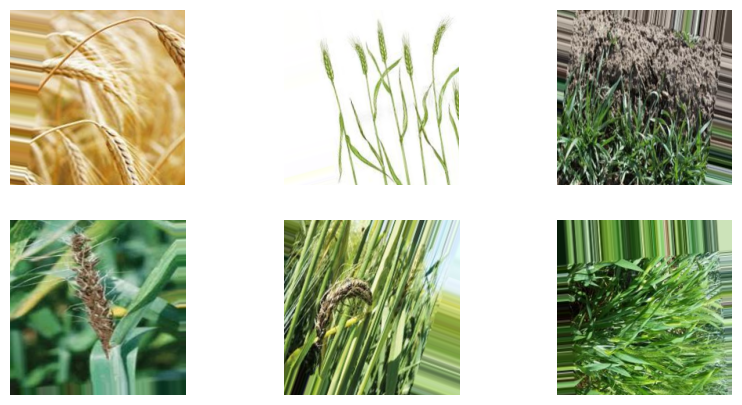

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a batch of augmented images
x_batch, y_batch = next(train_generator)

# Display the first few images from the batch
plt.figure(figsize=(10, 5))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(x_batch[i])  # Display the image
    plt.axis('off')
plt.show()


**Check for Image Quality and Preprocessing**

In [42]:
# Check the first image in the generator
first_image = x_batch[0]
print(f"Image shape: {first_image.shape}")
print(f"Image pixel values range: {first_image.min()} to {first_image.max()}")


Image shape: (224, 224, 3)
Image pixel values range: 0.0 to 1.0


Classes: ['renamed_healthy', 'renamed_Wheat_Leaf_Rust', 'renamed_Wheat_Loose_Smut']


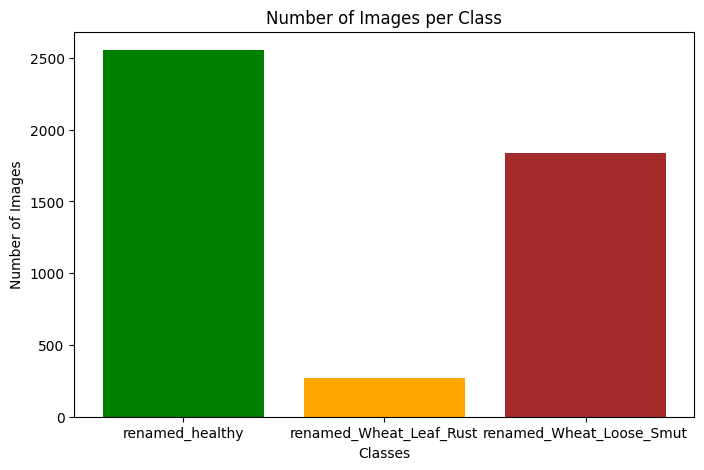

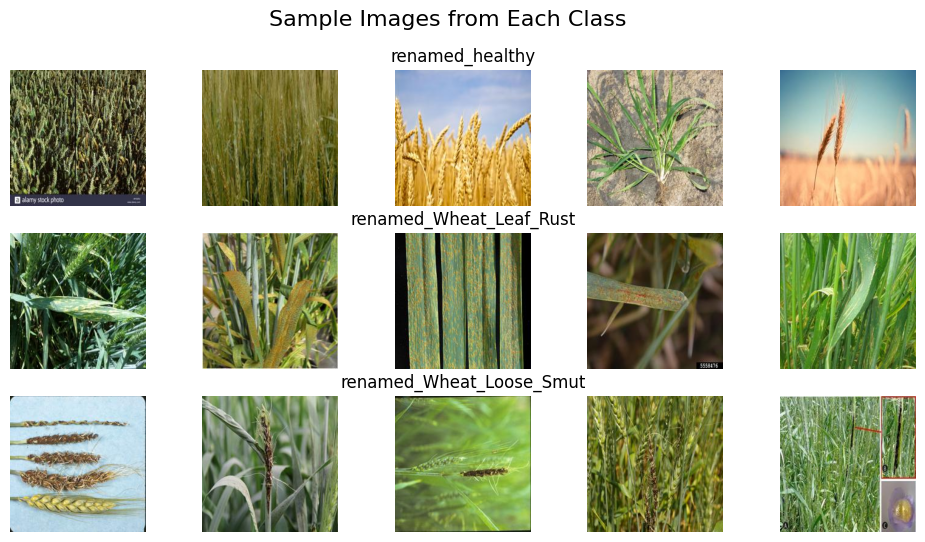

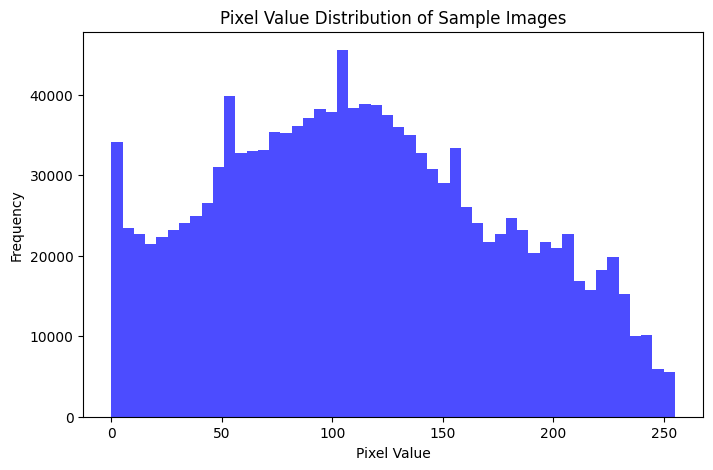

In [43]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Folder paths
train_folder = '/content/drive/MyDrive/Wheat_Leaf_Disease_Project/train'

# Get class names
classes = os.listdir(train_folder)
print("Classes:", classes)

# 1️⃣ Class distribution
class_counts = {}
for class_name in classes:
    class_folder = os.path.join(train_folder, class_name)
    class_counts[class_name] = len(os.listdir(class_folder))

plt.figure(figsize=(8,5))
plt.bar(class_counts.keys(), class_counts.values(), color=['green','orange','brown'])
plt.title("Number of Images per Class")
plt.xlabel("Classes")
plt.ylabel("Number of Images")
plt.show()

# 2️⃣ Display sample images per class
plt.figure(figsize=(12,6))
for i, class_name in enumerate(classes):
    class_folder = os.path.join(train_folder, class_name)
    sample_images = os.listdir(class_folder)[:5]  # Take first 5 images

    for j, img_name in enumerate(sample_images):
        img_path = os.path.join(class_folder, img_name)
        img = Image.open(img_path)

        plt.subplot(len(classes), 5, i*5 + j + 1)
        plt.imshow(img)
        plt.axis('off')
        if j == 2:
            plt.title(class_name)
plt.suptitle("Sample Images from Each Class", fontsize=16)
plt.show()

# 3️⃣ Pixel value distribution of few random images
sample_pixels = []
for class_name in classes:
    class_folder = os.path.join(train_folder, class_name)
    sample_images = os.listdir(class_folder)[:3]  # 3 images per class
    for img_name in sample_images:
        img_path = os.path.join(class_folder, img_name)
        img = Image.open(img_path)
        img_array = np.array(img)
        sample_pixels.extend(img_array.flatten())

plt.figure(figsize=(8,5))
plt.hist(sample_pixels, bins=50, color='blue', alpha=0.7)
plt.title("Pixel Value Distribution of Sample Images")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()
